In [ ]:
#주성분 분석

In [ ]:
# 차원과 차원축소
# 주성분분석이란
# 데이터에 있는 분산이 큰 방향을 찾는 것으로 이해할 수 있다.(분산은 데이터가 널리 퍼져있는 정도를 의미)
# 이렇게 그어진 것(벡터)를 주성분 이라고 한다.
# 주성분 벡터의 원소개수는 원본 데이터세트에 있는 특성의 개수와도 같다.
# 주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어든다.(중요!!)

In [1]:
# PCA 클래스
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2024-01-15 17:09:11--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-01-15 17:09:11--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-01-15 17:09:12--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
print(pca.components_.shape) #50개의 주성분이 있고 두번째 차원은 원본과 같은 10,000이다.

(50, 10000)


In [9]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)  #n은 샘플개수이다.
    #한줄에 10개씩 이미지를 그린다. 샘플개수는 10으로 나누어 전체 행개수를 계산
    rows = int(np.ceil(n/10))
    # 행이 1개면 열의 개수는 샘플 개수이다. 그렇지않으면 10개이다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
      for j in range(cols):
        if i*10 + j < n: # n개까지만 그린다.
          axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
        axs[i, j].axis('off')
    plt.show()

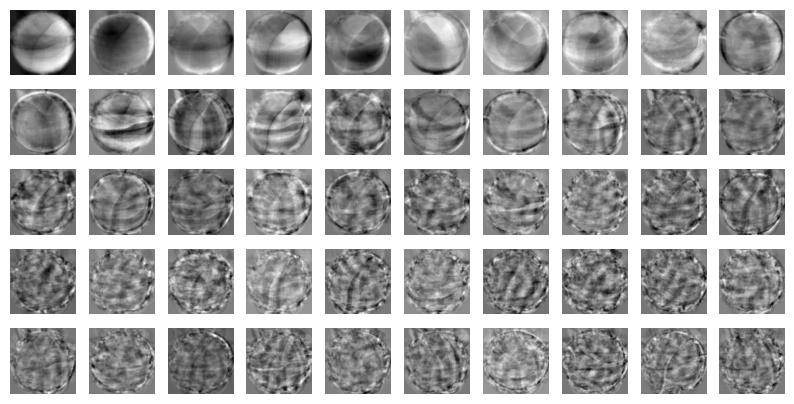

In [10]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [11]:
#원본데이터의 차원을 50개로 줄여보기

#원본차원확인
print(fruits_2d.shape)

(300, 10000)


In [12]:
# 차원이 10,000에서 50으로 줄어든 것을 볼 수 있다.
# 차원이 준다 -> 특성이 줄어든다. 로도 볼 수 있으며, 데이터의 공간이 무려 1/20가까이 줄어들었다.
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [13]:
# 줄인 특성을 다시 늘려보기
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


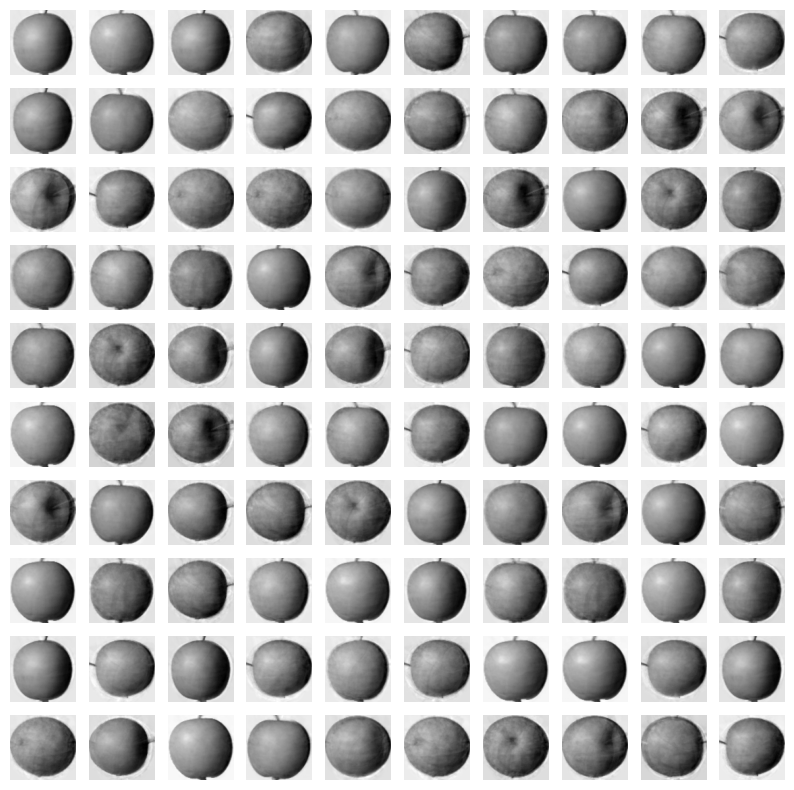

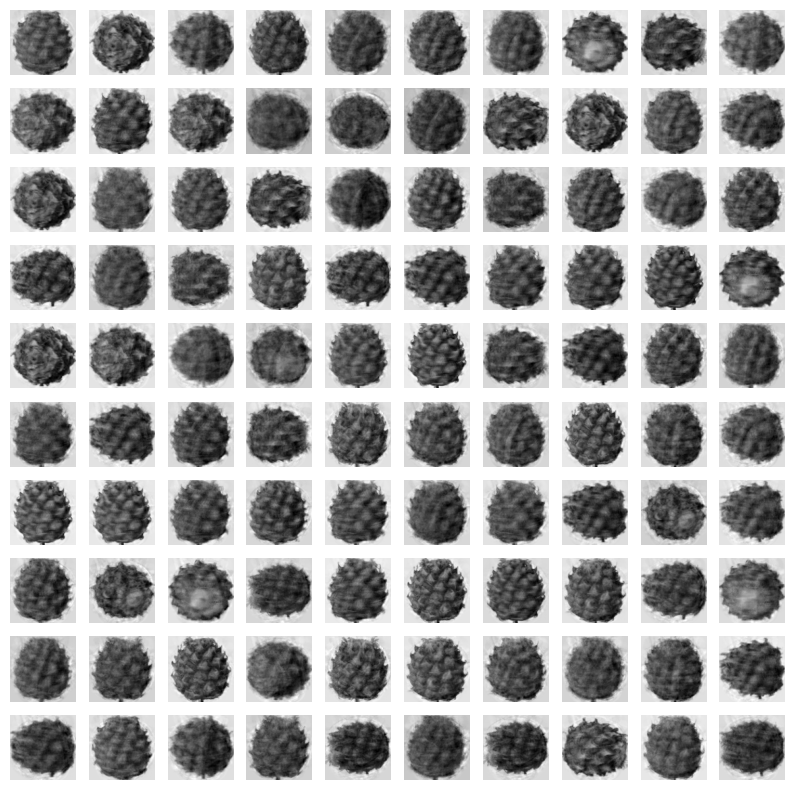

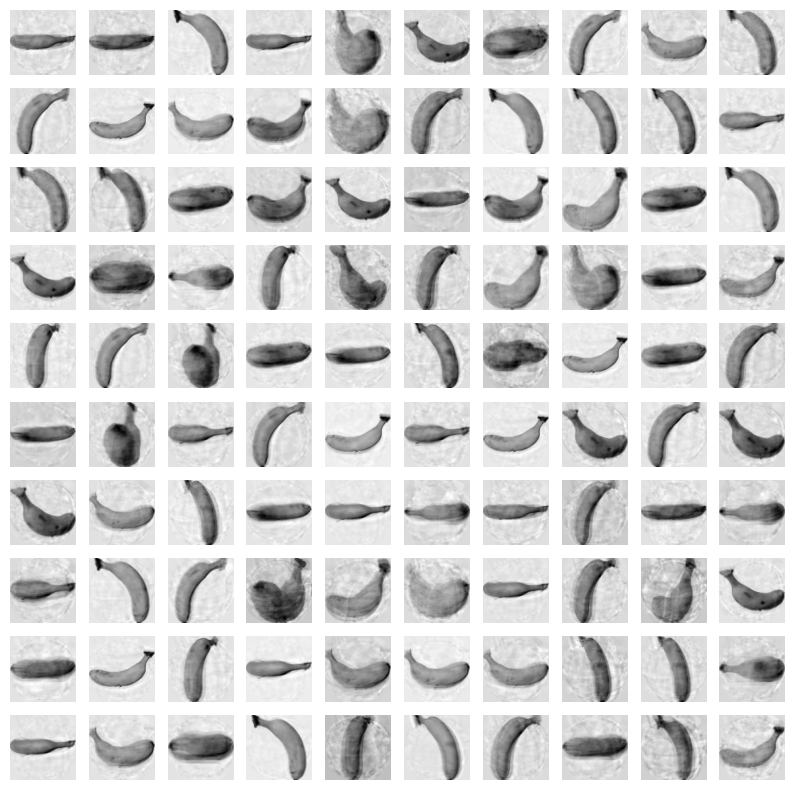

In [14]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')

In [15]:
# 설명된 분산
print(np.sum(pca.explained_variance_ratio_))

0.9215549725662066


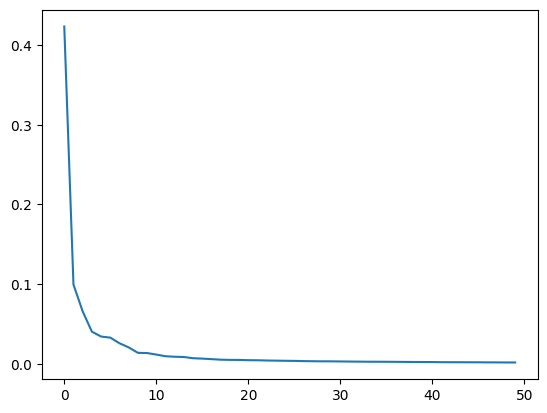

In [16]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [17]:
# 다른 알고리즘과 함께 사용해보기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [18]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [19]:
from sklearn.model_selection import cross_validate

#원본으로 교차검증하기
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score'])) # 검증점수
print(np.mean(scores['fit_time']))   # 걸린시간

0.9966666666666667
2.42184157371521


In [20]:
#차원축소한 데이터로 교차검증하기
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.07720770835876464


In [21]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [22]:
print(pca.n_components_) #특성이 2개일때 원본데이터의 분산의 50%를 표현할 수 있다는걸 의미한다.

2


In [23]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [25]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.027260684967041017


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [26]:
# K평균 알고리즘 사용해보기
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


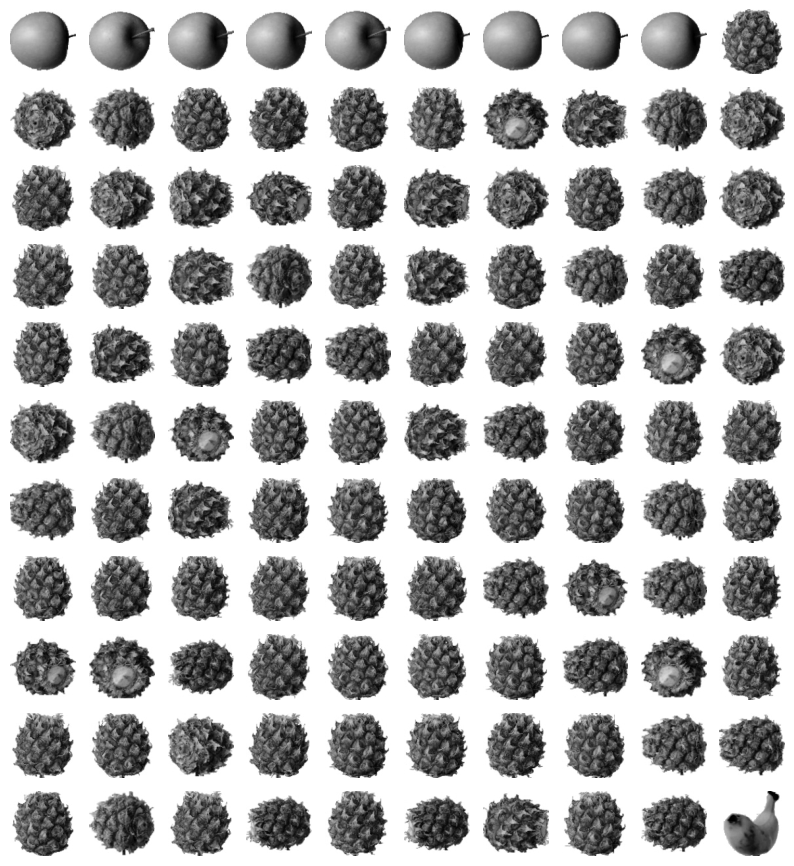

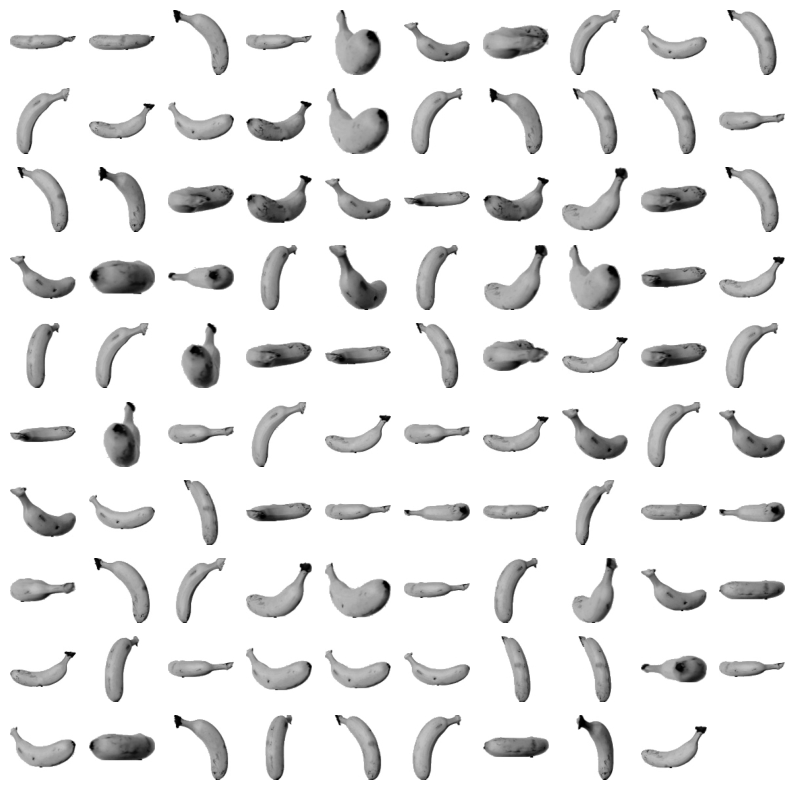

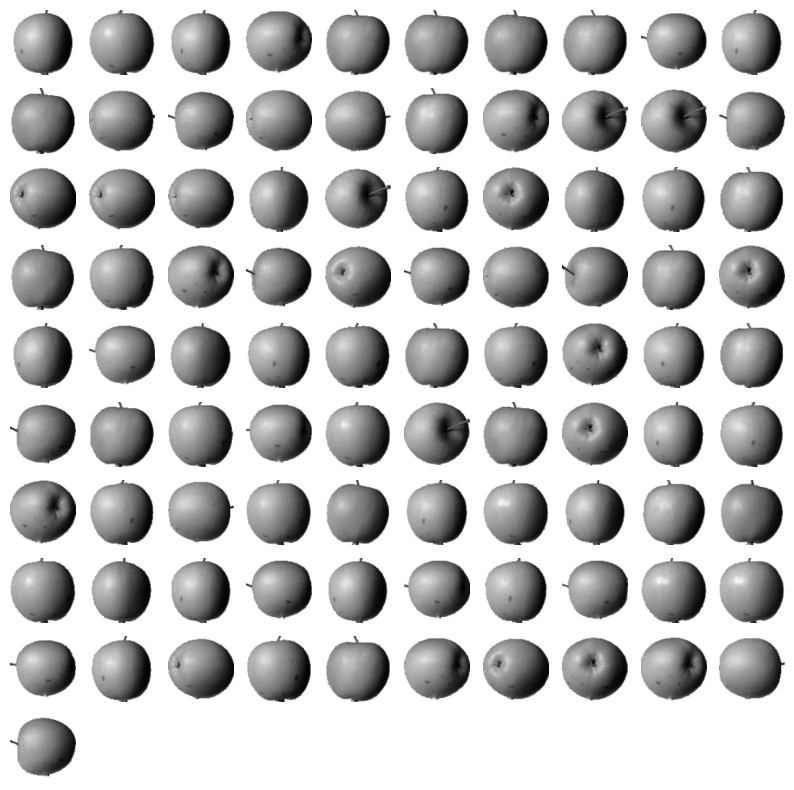

In [28]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print('\n')

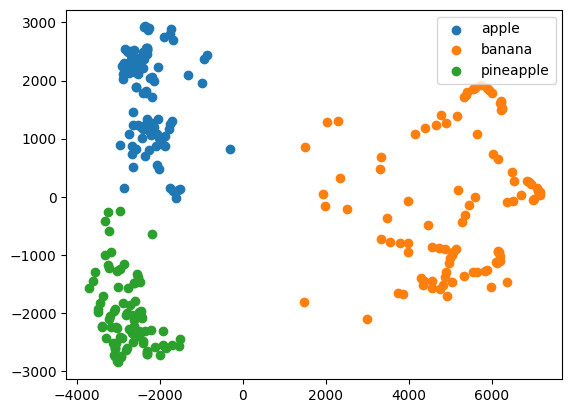

In [29]:
#산점도로 표현하기
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()